In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

In [3]:
df = pd.read_csv("./clean_df.csv", usecols=["ids", "user", "text", "sentiment", "dayofweek", "hour", "min", "n_tweet", "positive_emo", "negative_emo", "tweet_len_before", "tweet_len_after"])
valid_mask = ~df["sentiment"].isna()

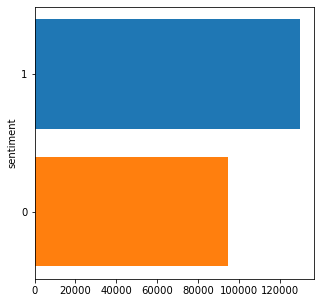

In [4]:
pos = df[df['sentiment'] == 1].count()[0]
neg = df[df['sentiment'] == 0].count()[0]

y = [pos, neg]

x = np.arange(2)

fig, ax = plt.subplots(figsize=(5,5))

width = 0.8

ax.barh(x, y, color=["tab:blue", "tab:orange"])

#ax.set_title('sentiment distribution')
ax.invert_yaxis()
ax.set_ylabel("count")

ax.set_ylabel("sentiment")
ax.set_yticks(x)
ax.set_yticklabels(["1", "0"])

plt.savefig('sentiment_distribution.pdf')
plt.show()

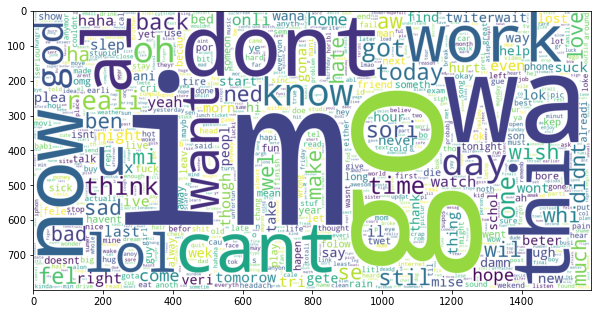

In [28]:
neg_text = df[df["sentiment"] == 0]["text"]
stopwords = set(STOPWORDS)
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="white", max_words = 1000 , width = 1600 , height = 800, stopwords=stopwords, collocations=False).generate(" ".join(neg_text))

plt.imsave('wordcloud_neg.png', wc)
plt.imshow(wc)

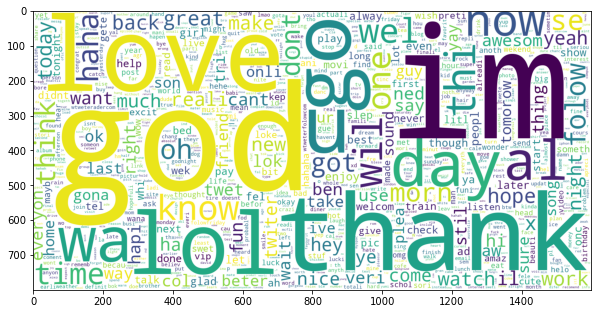

In [27]:
pos_text = df[df["sentiment"] == 1]["text"]
stopwords = set(STOPWORDS)
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="white", max_words = 1000 , width = 1600 , height = 800, stopwords=stopwords, collocations=False).generate(" ".join(pos_text))

plt.imsave('wordcloud_pos.png', wc)
plt.imshow(wc)

In [7]:
df_lr = pd.read_csv("./grid_lr.csv", usecols=["C", "max_iter", "solver", "f1_macro"])
df_svc = pd.read_csv("./grid_svc.csv", usecols=["C", "max_iter", "f1_macro"])
df_f1 = pd.read_csv("./f1_res.csv", index_col="Unnamed: 0")

In [8]:
df_lr.sort_values("f1_macro", ascending=False)

,C,max_iter,solver,f1_macro
9,2,100,liblinear,0.800507
11,2,500,liblinear,0.800507
13,2,1000,liblinear,0.800507
15,2,5000,liblinear,0.800507
10,2,500,lbfgs,0.800488
12,2,1000,lbfgs,0.800488
14,2,5000,lbfgs,0.800488
8,2,100,lbfgs,0.800260
2,1,500,lbfgs,0.795751
4,1,1000,lbfgs,0.795751


In [9]:
df_svc.sort_values("f1_macro", ascending=True)

,C,max_iter,f1_macro
4,2,100,0.788191
5,2,500,0.788191
6,2,1000,0.788191
7,2,5000,0.788191
0,1,100,0.795516
1,1,500,0.795516
2,1,1000,0.795516
3,1,5000,0.795516


In [10]:
df_f1

,LogisticRegressor,LinearSVC
100,0.650705,0.649478
500,0.736945,0.734705
1000,0.753517,0.751492
5000,0.784935,0.782573
10000,0.790985,0.788429
50000,0.797260,0.785569
100000,0.798406,0.784142
500000,0.799168,0.792187


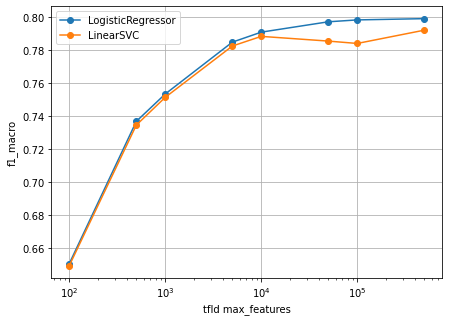

In [11]:
#x = np.log10(df_f1.index.values)
x = df_f1.index.values
y1 = df_f1["LogisticRegressor"]
y2 = df_f1["LinearSVC"]

fig, ax = plt.subplots(figsize=(7,5))
              
ax.plot(x, y1, marker="o", label="LogisticRegressor")
ax.plot(x, y2, marker="o", label="LinearSVC")

ax.set_xscale("log")

#ax.set_title('f1 score with data preprocessing')

ax.set_ylabel("f1_macro")
ax.set_xlabel("tfId max_features")

ax.legend()
ax.grid()
plt.savefig('f1_score_with_data_preprocessing.pdf')
plt.show()

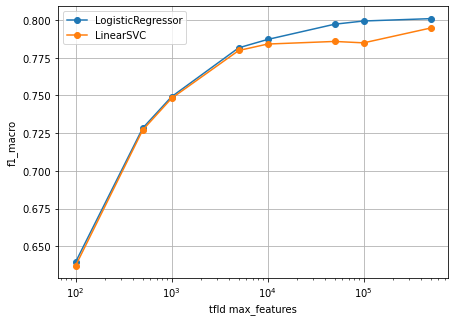

In [12]:
df_f1_raw = pd.read_csv("./f1_res_raw.csv", index_col="Unnamed: 0")

x = df_f1_raw.index.values
y1_raw = df_f1_raw["LogisticRegressor"]
y2_raw = df_f1_raw["LinearSVC"]

fig, ax = plt.subplots(figsize=(7,5))
              
ax.plot(x, y1_raw, marker="o", label="LogisticRegressor")
ax.plot(x, y2_raw, marker="o", label="LinearSVC")

ax.set_xscale("log")

#ax.set_title('f1 score with no data preprocessing')

ax.set_ylabel("f1_macro")
ax.set_xlabel("tfId max_features")

ax.legend()
ax.grid()
plt.savefig('f1_score_with_no_data_preprocessing.pdf')
plt.show()

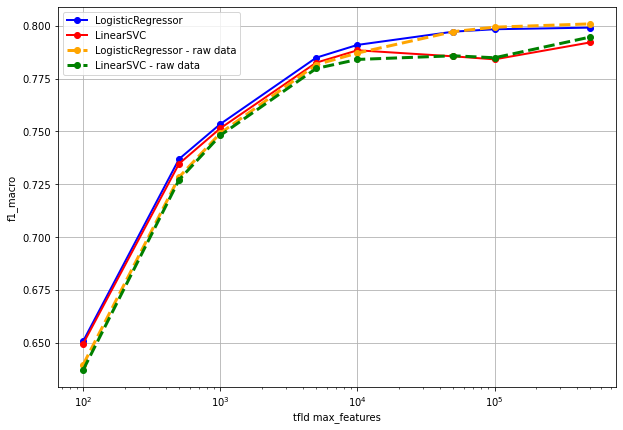

In [13]:

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(x, y1, marker="o", linewidth=2, color="blue", label="LogisticRegressor")
ax.plot(x, y2, marker="o", linewidth=2, color="red", label="LinearSVC")            
ax.plot(x, y1_raw, marker="o", linewidth=3, linestyle="--", color="orange", label="LogisticRegressor - raw data")
ax.plot(x, y2_raw, marker="o", linewidth=3, linestyle="--", color="green", label="LinearSVC - raw data")

ax.set_xscale("log")

#ax.set_title('f1 score')

ax.set_ylabel("f1_macro")
ax.set_xlabel("tfId max_features")

ax.legend()
ax.grid()
plt.savefig('f1_score.pdf')
plt.show()

#the processing made by tfIdfVectorizer is comparable (or at least has the same influence on the result)
#of the one done by ourself

In [14]:
df["tweet_len_before"].mean()

77.65630198037954

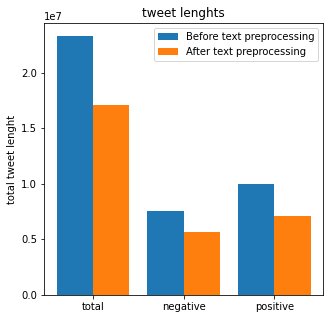

In [15]:
tot_before = df["tweet_len_before"].sum()
tot_after = df["tweet_len_after"].sum()

tot_before_neg = df[df["sentiment"] == 0]["tweet_len_before"].sum()
tot_after_neg = df[df["sentiment"] == 0]["tweet_len_after"].sum()

tot_before_pos = df[df["sentiment"] == 1]["tweet_len_before"].sum()
tot_after_pos = df[df["sentiment"] == 1]["tweet_len_after"].sum()

y_before = [tot_before, tot_before_neg, tot_before_pos]
y_after = [tot_after, tot_after_neg, tot_after_pos]

x = np.arange(3)

fig, ax = plt.subplots(figsize=(5,5))

width = 0.4

ax.bar(x - width/2, y_before, width=width, label="Before text preprocessing")
ax.bar(x + width/2, y_after, width=width, label="After text preprocessing")

ax.set_title('tweet lenghts')

ax.set_ylabel("total tweet lenght")

ax.set_xticks(x)
ax.set_xticklabels(["total", "negative", "positive"])

ax.legend()
plt.savefig('tweet_lenghts.png')
plt.show()

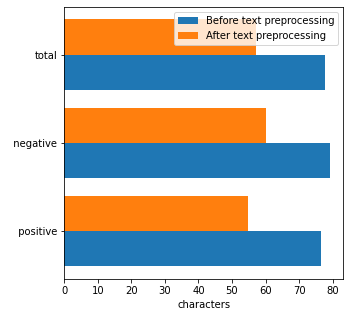

In [16]:
tot_before = df["tweet_len_before"].mean()
tot_after = df["tweet_len_after"].mean()

tot_before_neg = df[df["sentiment"] == 0]["tweet_len_before"].mean()
tot_after_neg = df[df["sentiment"] == 0]["tweet_len_after"].mean()

tot_before_pos = df[df["sentiment"] == 1]["tweet_len_before"].mean()
tot_after_pos = df[df["sentiment"] == 1]["tweet_len_after"].mean()

y_before = [tot_before, tot_before_neg, tot_before_pos]
y_after = [tot_after, tot_after_neg, tot_after_pos]

x = np.arange(3)

fig, ax = plt.subplots(figsize=(5,5))

height = 0.4

ax.barh(x+height/2, y_before, height=height, label="Before text preprocessing")
ax.barh(x-height/2, y_after,  height=height, label="After text preprocessing")

#ax.set_title('tweet lenghts')

ax.invert_yaxis()

ax.set_xlabel("characters")

ax.set_yticks(x)
ax.set_yticklabels(["total", "  negative", "  positive"])

ax.legend()
plt.savefig('tweet_lenghts_mean.pdf')
plt.show()

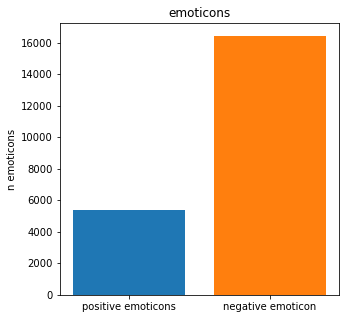

In [18]:
pos_emo = df["positive_emo"].sum()
neg_emo = df["negative_emo"].sum()

y = [pos_emo, neg_emo]

x = np.arange(2)

fig, ax = plt.subplots(figsize=(5,5))

width = 0.8

ax.bar(x, y, width=width, color=["tab:blue", "tab:orange"])

ax.set_title('emoticons')

ax.set_ylabel("n emoticons")

ax.set_xticks(x)
ax.set_xticklabels(["positive emoticons", "negative emoticon"])

plt.savefig('emoticons.png')
plt.show()

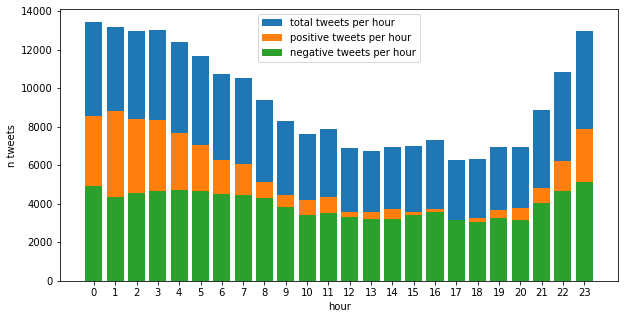

In [19]:
y_tot = df[valid_mask].groupby("hour").count()["ids"].values
y_pos = df[df["sentiment"] == 1].groupby("hour").count()["ids"].values
y_neg = df[df["sentiment"] == 0].groupby("hour").count()["ids"].values

x = np.arange(len(y_tot))  

fig, ax = plt.subplots(figsize=(10,5))

width = 0.8

ax.bar(x, y_tot, width=width, label="total tweets per hour")
ax.bar(x, y_pos, width=width, label="positive tweets per hour")
ax.bar(x, y_neg, width=width, label="negative tweets per hour")

#ax.set_title('tweets distribution in a day')

ax.set_ylabel("n tweets")

ax.set_xticks(x)
ax.set_xlabel("hour")

ax.legend()
plt.savefig('tweets_distribution_day.pdf')
plt.show()

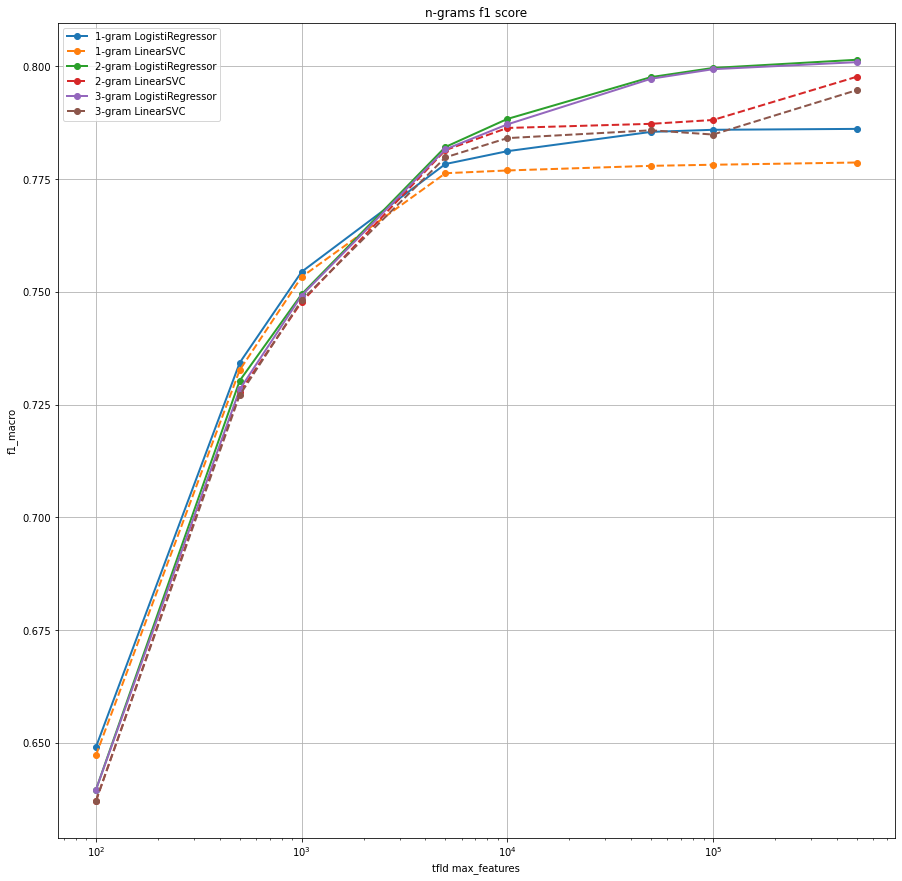

In [20]:
x = df_f1_raw.index.values

fig, ax = plt.subplots(figsize=(15,15))

for i in [0, 1, 2]:
    ngram_df = pd.read_csv(f"./ngram_compare_{i}.csv", index_col="Unnamed: 0")
    y1 = ngram_df["LogisticRegressor"]
    y2 = ngram_df["LinearSVC"]

    ax.plot(x, y1, marker="o", linewidth=2, label=f"{i+1}-gram LogistiRegressor")
    ax.plot(x, y2, marker="o", linewidth=2, linestyle="--", label=f"{i+1}-gram LinearSVC")

ax.set_xscale("log")

ax.set_title('n-grams f1 score')

ax.set_ylabel("f1_macro")
ax.set_xlabel("tfId max_features")

ax.legend()
ax.grid()
plt.savefig('n-grams_f1_score.png')
plt.show()

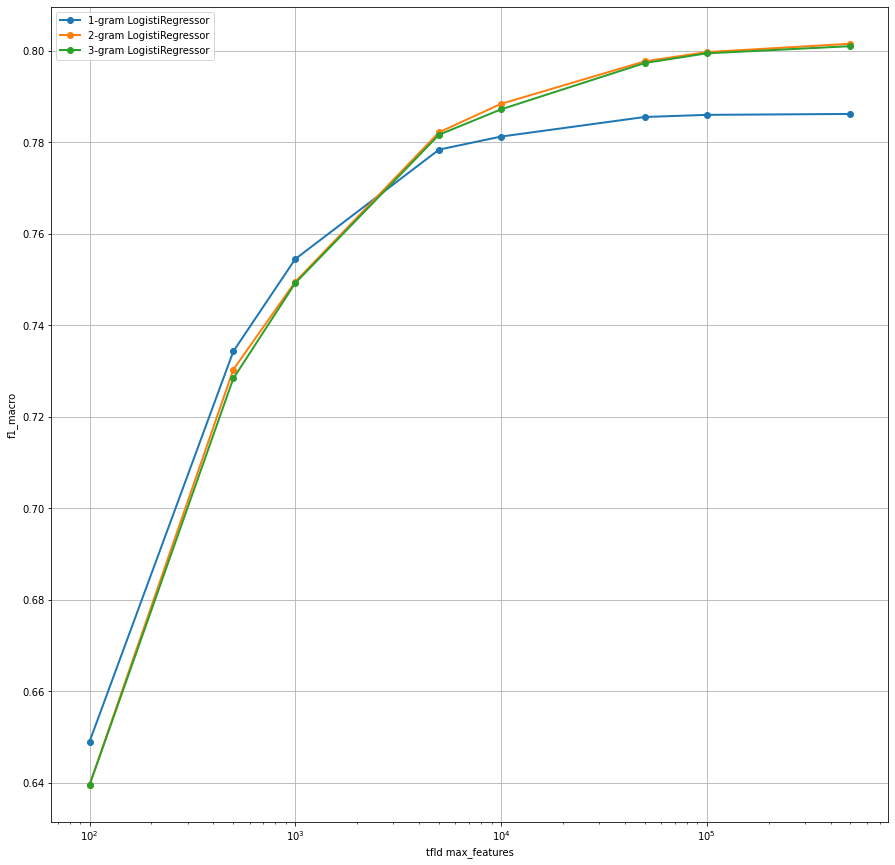

In [21]:
x = df_f1_raw.index.values

fig, ax = plt.subplots(figsize=(15, 15))

for i in [0, 1, 2]:
    ngram_df = pd.read_csv(f"./ngram_compare_{i}.csv", index_col="Unnamed: 0")
    y1 = ngram_df["LogisticRegressor"]
    y2 = ngram_df["LinearSVC"]

    ax.plot(x, y1, marker="o", linewidth=2, label=f"{i+1}-gram LogistiRegressor")
    #ax.plot(x, y2, marker="o", linewidth=2, linestyle="--", label=f"{i+1}-gram LinearSVC")

ax.set_xscale("log")

#ax.set_title('n-grams f1 score')

ax.set_ylabel("f1_macro")
ax.set_xlabel("tfId max_features")

ax.legend()
ax.grid()
plt.savefig('n-grams_f1_score_lr.pdf')
plt.show()

In [22]:
df_lr_sw = pd.read_csv("./grid_lr_stopwords.csv", usecols=["C", "max_iter", "solver", "f1_macro"])
df_svc_sw = pd.read_csv("./grid_svc_stopwords.csv", usecols=["C", "max_iter", "f1_macro"])
df_f1_sw = pd.read_csv("./f1_res_stopwords.csv", index_col="Unnamed: 0")

In [23]:
df_lr_sw.sort_values("f1_macro", ascending=False)

,C,max_iter,solver,f1_macro
8,2,100,lbfgs,0.774031
9,2,100,liblinear,0.773778
11,2,500,liblinear,0.773778
13,2,1000,liblinear,0.773778
15,2,5000,liblinear,0.773778
10,2,500,lbfgs,0.773762
12,2,1000,lbfgs,0.773762
14,2,5000,lbfgs,0.773762
2,1,500,lbfgs,0.769988
4,1,1000,lbfgs,0.769988


In [24]:
df_svc_sw.sort_values("f1_macro", ascending=False)

,C,max_iter,f1_macro
0,1,100,0.768950
1,1,500,0.768950
2,1,1000,0.768950
3,1,5000,0.768950
4,2,100,0.761944
5,2,500,0.761944
6,2,1000,0.761944
7,2,5000,0.761944


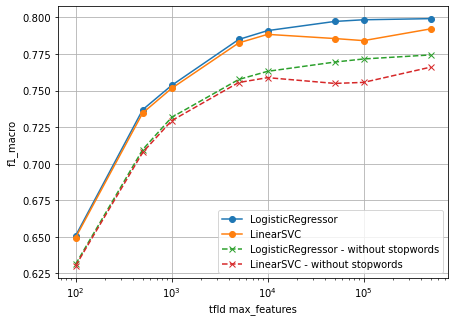

In [25]:
#x = np.log10(df_f1.index.values)
x = df_f1.index.values
y1 = df_f1["LogisticRegressor"]
y2 = df_f1["LinearSVC"]
y3 = df_f1_sw["LogisticRegressor"]
y4 = df_f1_sw["LinearSVC"]

fig, ax = plt.subplots(figsize=(7,5))

ax.plot(x, y1, marker="o", label="LogisticRegressor")
ax.plot(x, y2, marker="o", label="LinearSVC")
ax.plot(x, y3, marker="x", linestyle="--", label="LogisticRegressor - without stopwords")
ax.plot(x, y4, marker="x", linestyle="--", label="LinearSVC - without stopwords")

ax.set_xscale("log")

#ax.set_title('f1 score with data preprocessing')

ax.set_ylabel("f1_macro")
ax.set_xlabel("tfId max_features")

ax.legend()
ax.grid()
plt.savefig('f1_score_stopword.pdf')
plt.show()